# ML PROJECT: College Applications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data_set = pd.read_csv("D:\College_Admissions.csv",encoding ="ISO-8859-1",engine="python")

In [3]:
data_set.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)
data_set.drop('Serial No.', axis=1, inplace=True)

In [4]:
data_set.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Checking For Null Values

In [5]:
data_set.isna().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

### Checking for duplicate values

In [6]:
data_set.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [7]:
data_set

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


### Checking the mean, standard deviation, minimum and maximum value for each feature

In [9]:
data_set.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Dropping duplicates( As we have none in this specific data set, it doesn't make a difference)

In [10]:
data_set.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


### Analyzing features from the data set

Text(0.5, 1.0, 'Distributions for CGPA')

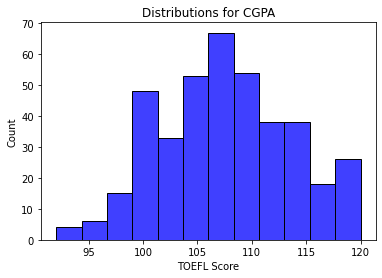

In [11]:
sns.histplot(x = 'TOEFL Score' ,data = data_set, color = 'blue').set_title('Distributions for CGPA')

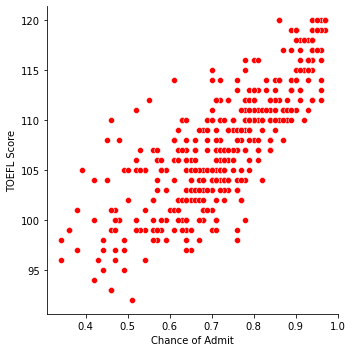

In [12]:
sns.relplot(y=data_set['TOEFL Score'],x=data_set['Chance of Admit'], color = 'red')

Text(0.5, 1.0, 'Distributions for GRE')

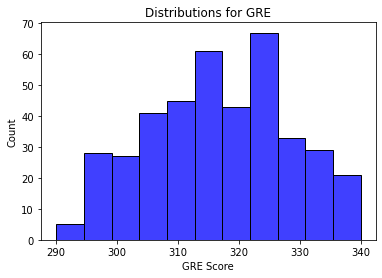

In [13]:
sns.histplot(x = 'GRE Score' ,data = data_set, color = 'blue').set_title('Distributions for GRE')

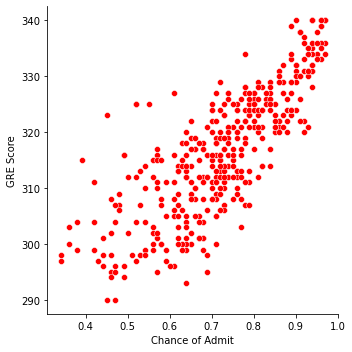

In [14]:
sns.relplot(y=data_set['GRE Score'],x=data_set['Chance of Admit'], color = 'Red')

Text(0.5, 1.0, 'Distributions for CGPA')

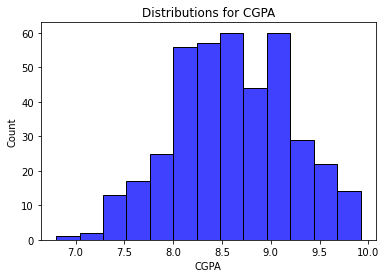

In [15]:
sns.histplot(x = 'CGPA' ,data = data_set, color = 'blue').set_title('Distributions for CGPA')

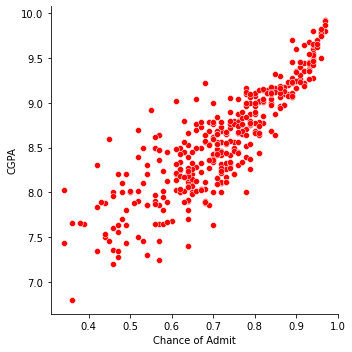

In [16]:
sns.relplot(y=data_set['CGPA'],x=data_set['Chance of Admit'], color= 'red')

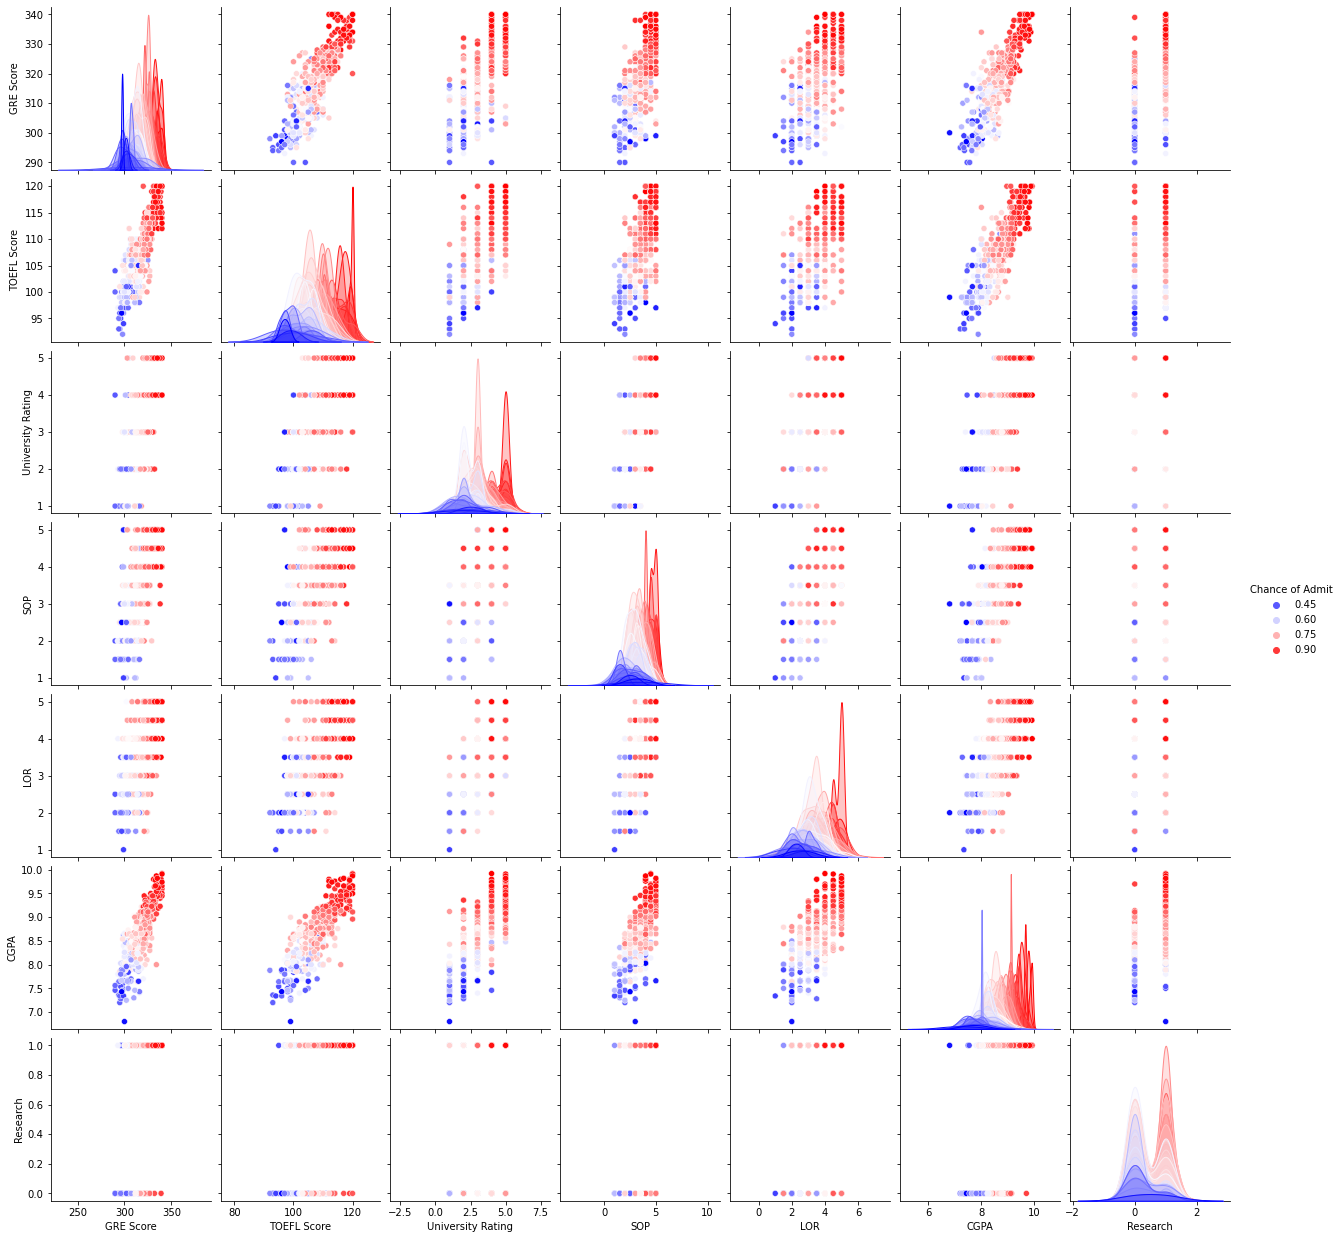

In [17]:
sns.pairplot(data_set,hue = "Chance of Admit",palette='bwr')

### Calculating correlation for each feature wrt target variable

In [18]:
correlation = pd.DataFrame(data_set.corr()['Chance of Admit'])
correlation.sort_values(['Chance of Admit'], ascending=False, inplace = True)
correlation

,Chance of Admit
Chance of Admit,1.000000
CGPA,0.873289
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
Research,0.553202


### Normalizing Features 

In [19]:
def normalizeFeatures(X):
    mu=np.mean(X)
    sigma=np.std(X)
    X_norm=(X - mu)/sigma
    return X_norm

In [20]:
data_set['GRE Score'] = normalizeFeatures(data_set['GRE Score'])
data_set['TOEFL Score'] = normalizeFeatures(data_set['TOEFL Score'])
data_set['University Rating'] = normalizeFeatures(data_set['University Rating'])
data_set['LOR'] = normalizeFeatures(data_set['LOR'])
data_set['SOP'] = normalizeFeatures(data_set['SOP'])
data_set['CGPA'] = normalizeFeatures(data_set['CGPA'])
data_set['Research'] = normalizeFeatures(data_set['Research'])

### Splitting the data set into training and testing set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data_set[['GRE Score', 'TOEFL Score', 'University Rating','LOR', 'SOP','CGPA', 'Research']]
y=  data_set['Chance of Admit']


In [23]:
X_train, X_test, y_train,y_test = train_test_split(X,y , random_state = 105,  train_size=0.8, shuffle=True)


### Scaling the code using standard scaler

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Importing linear regression model and fitting the training data

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
ft = LinearRegression()

In [27]:
ft.fit(X_train, y_train)

LinearRegression()

In [28]:
predictions = ft.predict(X_test)

### Calculating Mean square error

In [29]:
mean_squared_error(y_test,predictions)

0.0022492192655525086

In [30]:
ft.score(X_test,y_test)

0.8875639834635436

### Performing PCA on the data set

In [31]:
from sklearn.decomposition import PCA

In [32]:
admission = pd.read_csv("D:\College_Admissions.csv")
admission.head()
print(len(admission))

400


In [33]:
pca = PCA(n_components=2)

In [34]:
X_pca = pca.fit_transform(X)

In [35]:
A_train, A_test, b_train,b_test = train_test_split(X_pca ,y , random_state = 105, test_size=0.2, shuffle=True)
sc = StandardScaler()


In [36]:
A_train = sc.fit_transform(X_train)
A_test = sc.fit_transform(X_test)

### Training the regression model with PCA data set

In [37]:
gt = LinearRegression()
gt.fit(A_train, b_train)

LinearRegression()

In [38]:
predictions_PCA = gt.predict(A_test)

In [39]:
mean_squared_error(y_test,predictions_PCA)

0.00224921926555251

In [40]:
gt.score(A_test,b_test) 

0.8875639834635435

In [41]:
print(b_test)
print(predictions_PCA)

150    0.93
254    0.85
234    0.91
333    0.71
215    0.93
       ... 
223    0.71
382    0.82
190    0.90
371    0.89
217    0.85
Name: Chance of Admit, Length: 80, dtype: float64
[0.90045725 0.83283138 0.88064403 0.73396702 0.90403689 0.58953514
 0.56893805 0.59580318 0.69036206 0.44105398 0.83901912 0.63441286
 0.73016807 0.8086143  0.79393893 0.61769316 0.80122013 0.70972268
 0.73410475 0.67007899 0.81161638 0.63767141 0.6174933  0.72133238
 0.77839658 0.69523556 0.93609722 0.69127671 0.77536139 0.61793556
 0.58424739 0.90874591 0.52897905 0.76595379 0.72019122 0.65516915
 0.64678331 0.91828961 0.64742719 0.64734406 0.72515604 0.96462581
 0.76682539 0.70643139 0.67128148 0.50836221 0.43178475 0.86045765
 0.83237977 0.56949899 0.75987274 0.79430315 0.68285384 0.88380377
 0.64852393 0.46946117 0.67930923 0.46832968 0.83167947 0.78170969
 0.8437646  0.71022315 0.960154   0.70719037 0.74949676 0.68444692
 0.72412805 0.8589366  0.45338995 0.82293801 0.93989153 0.65844046
 0.50736163 0.

### Regression analysis

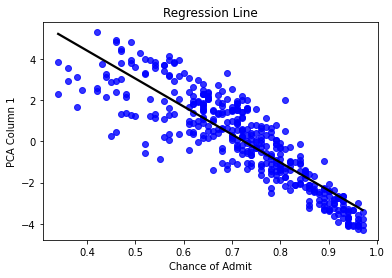

In [42]:
fig = sns.regplot(x = y, y = X_pca[:,0], ci =None, scatter_kws={"color": "blue"}, line_kws={"color": "black"}).set(title = 'Regression Line' ,ylabel='PCA Column 1')


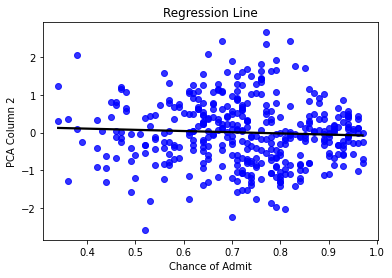

In [43]:
fig = sns.regplot(x = y, y = X_pca[:,1], ci =None, scatter_kws={"color": "blue"}, line_kws={"color": "black"}).set(title = 'Regression Line' ,ylabel='PCA Column 2')


### Copying the predictions of the models into CSV

In [44]:
#Saving predictions in CSV file
from numpy import savetxt
savetxt('LR_Predictions.csv', predictions, delimiter=',', fmt = '%.2f')

In [45]:
from numpy import savetxt
savetxt('LR_PCA_Predictions.csv', predictions_PCA, delimiter=',', fmt = '%.2f')
  